In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
net = pd.read_csv("dataset\\Internet-Demographic.csv")

In [4]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [25]:
net.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [18]:
net["Country Name"] = net["Country Name"].astype("category")
net["Income Group"] = net["Income Group"].astype("category")

In [26]:
net["Birth rate"] = pd.to_numeric(net["Birth rate"], errors="coerce")

In [27]:
net.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [30]:
result = net["Internet users"].corr(net["Birth rate"])
result

np.float64(-0.8155885551284765)

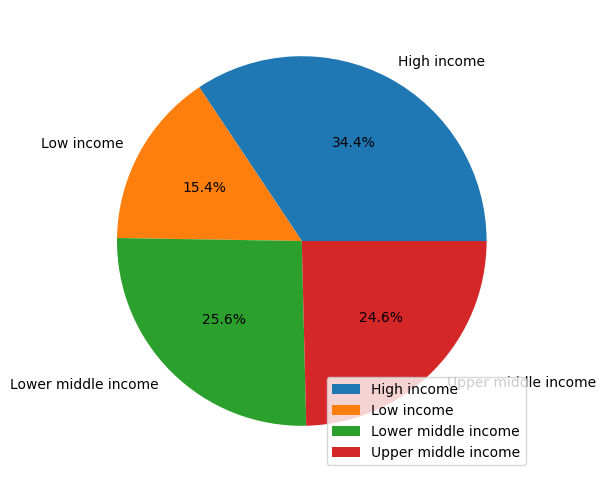

In [43]:
income = net.groupby(["Income Group"], observed=True).size()
income
plt.figure(figsize=(8, 6)) 
plt.pie(income, labels=income.index, autopct="%1.1f%%")  
plt.legend()
plt.show()

In [44]:
net["Internet users"].mean()

np.float64(42.07647089194872)

In [45]:
net2 = net[net["Internet users"] > 43]

In [46]:
net2["Internet users"].mean()

np.float64(67.686133746875)

In [47]:
net3 = net2[net2["Internet users"] > 67]

In [48]:
net3["Internet users"].mean()

np.float64(81.75577865999999)

In [62]:
net3[net3["Internet users"] > 94]

,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


<h1> 1. Histogram: Distribution of Birth Rate</h1>

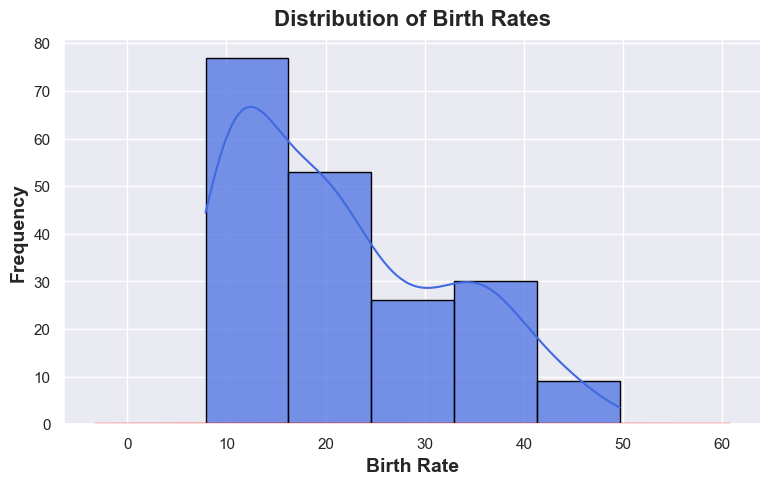

In [53]:
sns.set_theme(style="darkgrid")
sns.histplot(net["Birth rate"], bins=5, kde=True, color="royalblue", alpha=0.7, edgecolor="black")
sns.kdeplot(net["Birth rate"], color="red", linewidth=2)

plt.figure(figsize=(9, 5))
plt.xlabel("Birth Rate", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Distribution of Birth Rates", fontsize=16, fontweight="bold", pad=10)
plt.show()

<h1>2. Top 5 Countries with Highest Internet Usage </h1>

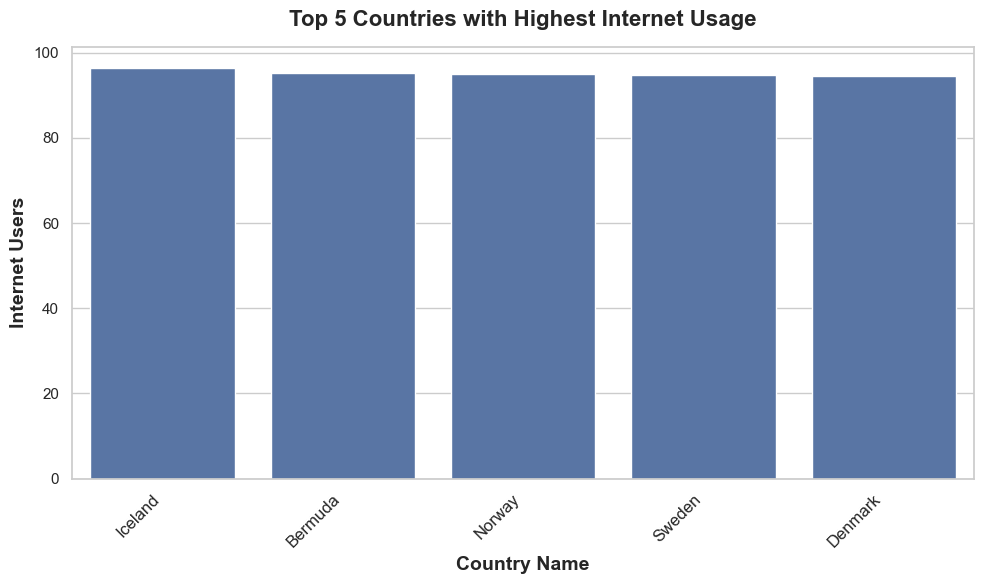

In [79]:
top_5 = net.nlargest(5, "Internet users")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x="Country Name", y="Internet users", data=top_5)
plt.xlabel("Country Name", fontsize=14, fontweight="bold")
plt.ylabel("Internet Users", fontsize=14, fontweight="bold")
plt.title("Top 5 Countries with Highest Internet Usage", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

<h1>  3. Count of Countries by Income Group </h1>

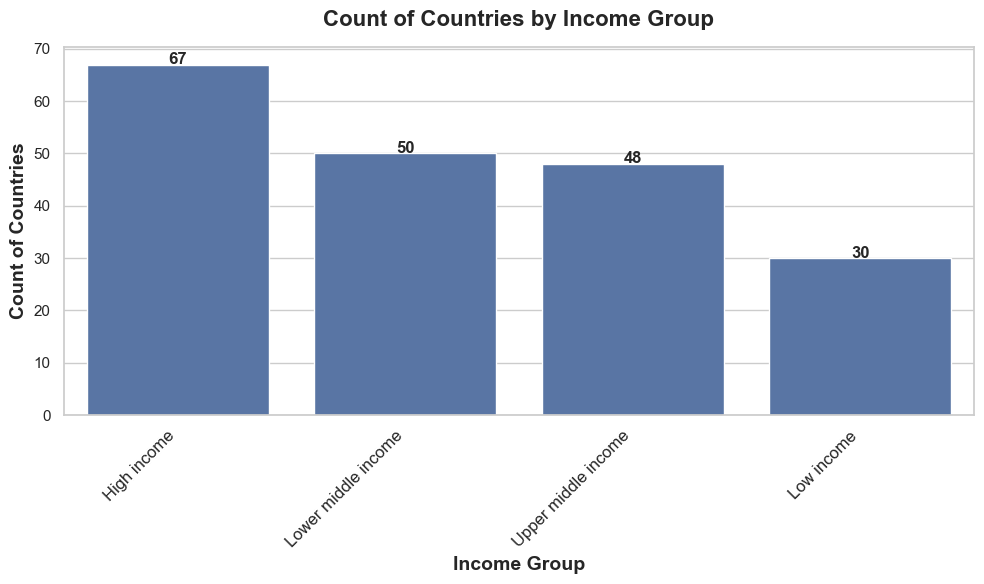

In [86]:
income_group_counts = net['Income Group'].value_counts()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=income_group_counts.index, y=income_group_counts.values)

plt.xlabel("Income Group", fontsize=14, fontweight="bold")
plt.ylabel("Count of Countries", fontsize=14, fontweight="bold")
plt.title("Count of Countries by Income Group", fontsize=16, fontweight="bold", pad=15)
for i, value in enumerate(income_group_counts.values):
    plt.text(i, value + 0.1, str(value), ha="center", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

<h1> 4. Box Plot of Internet Usage</h1>

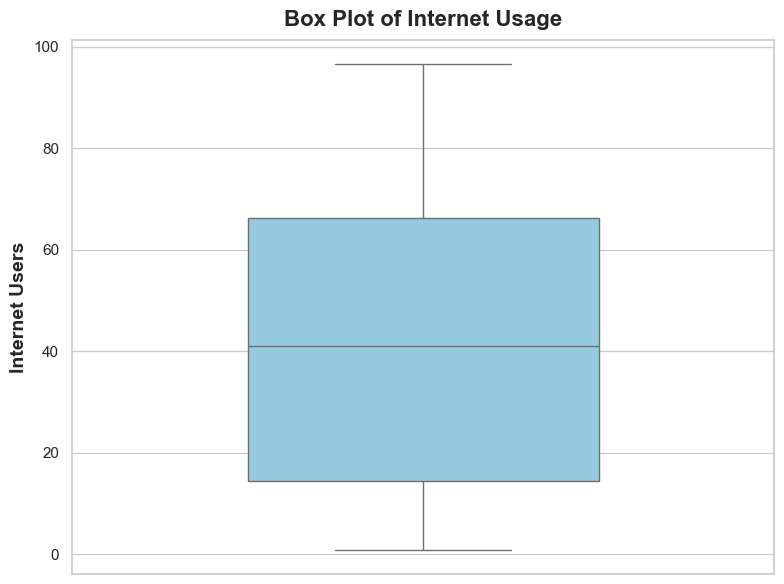

In [91]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=net["Internet users"], color="skyblue", width=0.5)

plt.ylabel("Internet Users", fontsize=14, fontweight="bold")
plt.title("Box Plot of Internet Usage", fontsize=16, fontweight="bold", pad=10)
plt.tight_layout()
plt.show()

<h1> 5. Countries with No Internet Access </h1>

In [94]:
no_internet = net[net["Internet users"] == 0]
print("Countries with No Internet Access:")
print(no_internet[["Country Name", "Internet users"]])

Countries with No Internet Access:
Empty DataFrame
Columns: [Country Name, Internet users]
Index: []


<h1> 6.  Average Birth Rate </h1

Average Birth Rate: 21.47


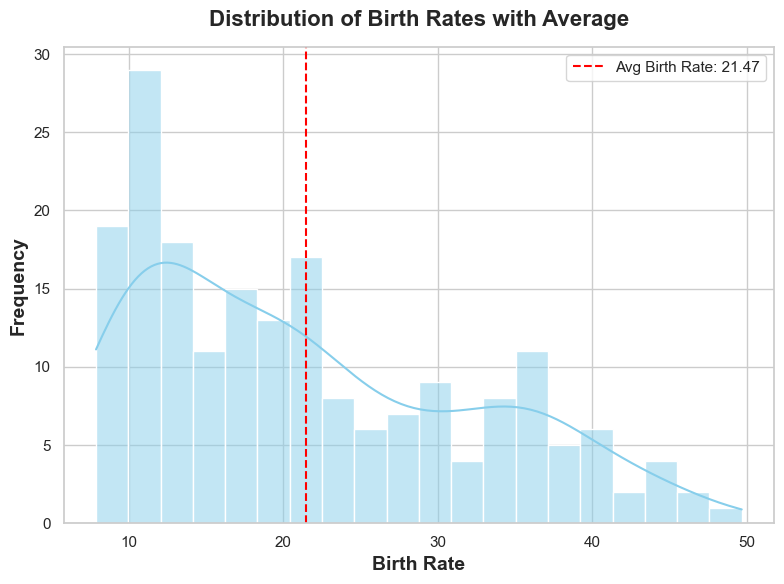

In [106]:
avg_birth_rate = net["Birth rate"].mean()
print(f"Average Birth Rate: {avg_birth_rate:.2f}")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(net["Birth rate"], bins=20, kde=True, color="skyblue")

plt.axvline(avg_birth_rate, color="red", linestyle="--", label=f"Avg Birth Rate: {avg_birth_rate:.2f}")
plt.xlabel("Birth Rate", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Distribution of Birth Rates with Average", fontsize=16, fontweight="bold", pad=15)
plt.legend()
plt.tight_layout()
plt.show()

<h1> 7. Scatter Plot: Birth Rate vs. Internet Usage</h1>

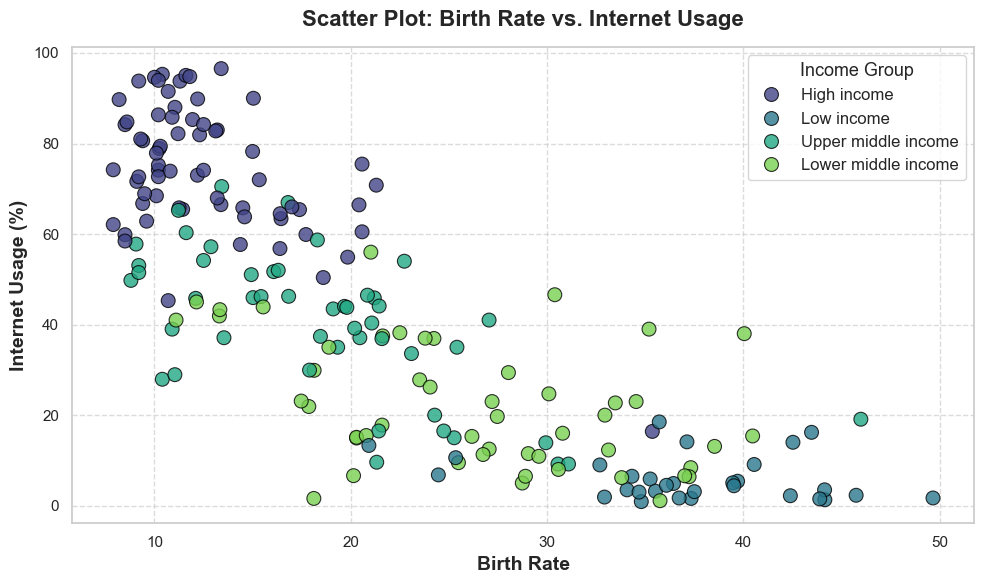

In [107]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Birth rate", y="Internet users", data=net, hue="Income Group", palette="viridis", s=100, edgecolor="black", alpha=0.8)

plt.xlabel("Birth Rate", fontsize=14, fontweight="bold")
plt.ylabel("Internet Usage (%)", fontsize=14, fontweight="bold")
plt.title("Scatter Plot: Birth Rate vs. Internet Usage", fontsize=16, fontweight="bold", pad=15)
plt.legend(title="Income Group", title_fontsize="13", loc="upper right", fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1> 8. Countries with Birth Rate Above 40 </h1>

Countries with Birth Rate Above 40:
          Country Name Country Code  Birth rate  Internet users  \
2              Angola          AGO      45.985            19.1   
11            Burundi          BDI      44.151             1.3   
14       Burkina Faso          BFA      40.551             9.1   
65        Gambia, The          GMB      42.525            14.0   
115              Mali          MLI      44.138             3.5   
127             Niger          NER      49.661             1.7   
128           Nigeria          NGA      40.045            38.0   
156           Somalia          SOM      43.891             1.5   
167              Chad          TCD      45.745             2.3   
178            Uganda          UGA      43.474            16.2   
192  Congo, Dem. Rep.          COD      42.394             2.2   
193            Zambia          ZMB      40.471            15.4   

            Income Group  
2    Upper middle income  
11            Low income  
14            Low incom

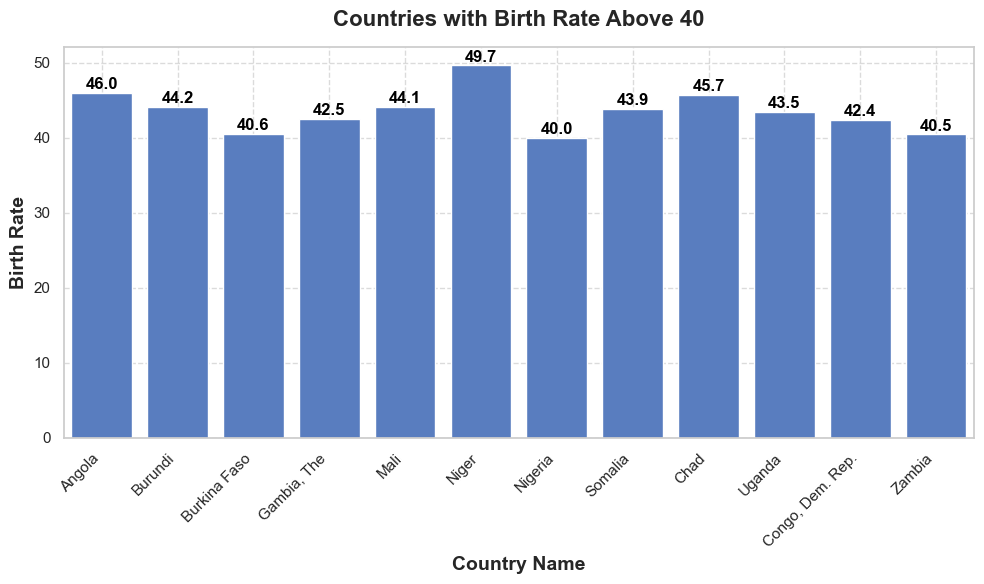

In [113]:
high_birth_rate = net[net["Birth rate"] > 40]
print("Countries with Birth Rate Above 40:\n", high_birth_rate)
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))
sns.barplot(x="Country Name", y="Birth rate", data=high_birth_rate)

plt.xlabel("Country Name", fontsize=14, fontweight="bold")
plt.ylabel("Birth Rate", fontsize=14, fontweight="bold")
plt.title("Countries with Birth Rate Above 40", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in enumerate(high_birth_rate["Birth rate"]):
    plt.text(index, value + 0.5, f"{value:.1f}", ha="center", fontsize=12, color="black", fontweight="bold")
plt.tight_layout()
plt.show()

<h1> 9. Pie Chart of Income Groups</h1>

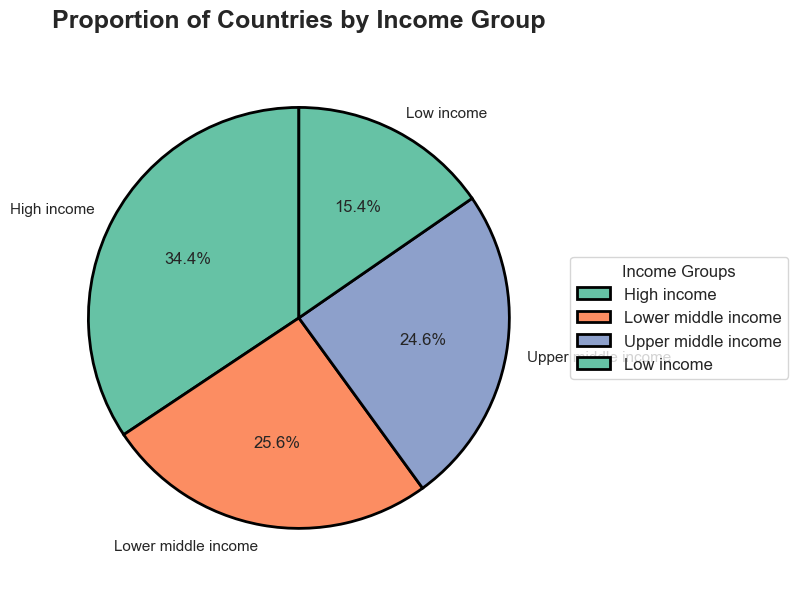

In [117]:
colors = sns.color_palette("Set2", n_colors=3)
plt.figure(figsize=(8, 8))
net["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', 
                                            colors=colors, 
                                            startangle=90, 
                                            wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': 'solid'})
plt.title("Proportion of Countries by Income Group", fontsize=18, fontweight="bold", pad=20)
plt.ylabel("", fontsize=12)
plt.legend(labels=net["Income Group"].value_counts().index, title="Income Groups", fontsize=12, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<h1> 10. Correlation Between Birth Rate and Internet Usage</h1>

Correlation between Birth Rate and Internet Usage: -0.82


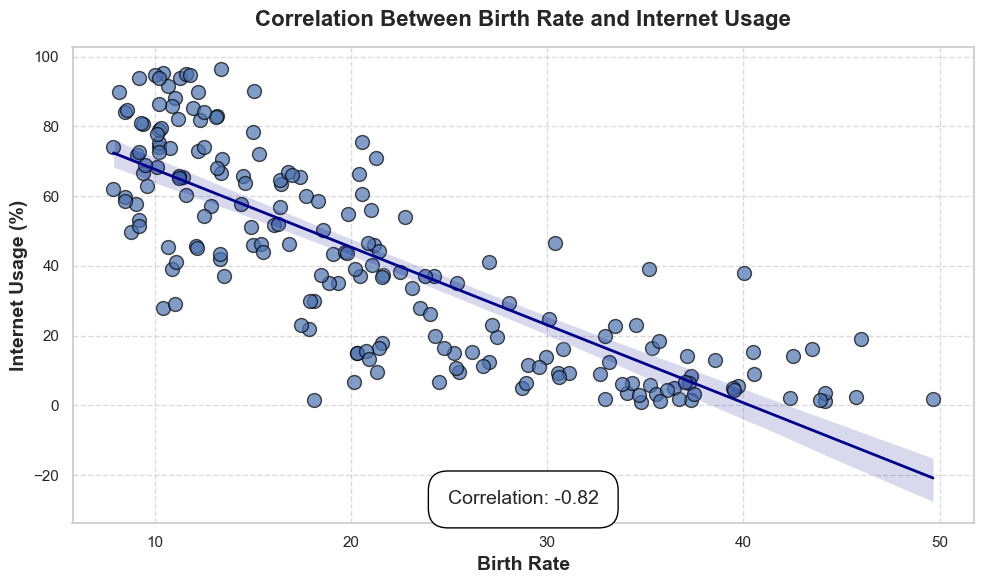

In [119]:
correlation = net["Birth rate"].corr(net["Internet users"])
print(f"Correlation between Birth Rate and Internet Usage: {correlation:.2f}")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x="Birth rate", y="Internet users", data=net, scatter_kws={"s": 100, "edgecolor": "black", "alpha": 0.7},
            line_kws={"color": "darkblue", "linewidth": 2}, marker="o")

plt.text(0.5, 0.05, f"Correlation: {correlation:.2f}", fontsize=14, ha='center', va='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.title("Correlation Between Birth Rate and Internet Usage", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Birth Rate", fontsize=14, fontweight="bold")
plt.ylabel("Internet Usage (%)", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()